# BIG DATA ANALYTICS WITH <font color='green'>PYSPARK</font>

## <font color='blue'>Pandas</font>

In [ ]:
import pandas as pd
import time

In [ ]:
# Define the file path
file_path = 'your_file_path'

In [ ]:
df = pd.read_csv(file_path)

#### <font color='blue'>Reading in the csv file using pd.read_csv doesn't work. My computer couldn't handle the massive dataset</font>

In [ ]:
# Start the timer
start_time = time.time()

df = pd.read_csv(file_path)

# End the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Print the first few rows of the DataFrame
print(df.head(5))

# Print the execution time
print("Execution Time using chunks:", execution_time, "seconds")

#### <font color='blue'>Reading in the csv file using chunks also doesn't work. My computer still could not handle the massive dataset</font>

In [ ]:
# Define the chunk size
chunk_size = 10000

# Initialize an empty list to store the chunks
chunks = []

# Start the timer
start_time = time.time()

# Iterate through the CSV file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate the chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)

# End the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Print the first few rows of the DataFrame
print(df.head(5))

# Print the execution time
print("Execution Time using chunks:", execution_time, "seconds")

## <font color='green'>Spark</font>

In [1]:
# Importing the necessary libraries
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, DateType
from pyspark.sql.functions import col, sum, countDistinct, count, regexp_replace, split, month, year, size, element_at, struct, trim, avg, expr, lit
from pyspark.sql import functions as F
from pyspark.sql.window import Window

In [2]:
# Create SparkSession
spark = SparkSession.builder \
    .appName("AmazonElectronics") \
    .getOrCreate()

In [3]:
# Define the schema
schema = StructType([
    StructField("timestamp", DateType(), True),
    StructField("asin", StringType(), True),
    StructField("brand", StringType(), True),
    StructField("buybox_seller", StringType(), True),
    StructField("final_price", StringType(), True),
    StructField("number_of_sellers", IntegerType(), True),
    StructField("root_bs_rank", IntegerType(), True),
    StructField("reviews_count", IntegerType(), True),
    StructField("ISBN10", StringType(), True),
    StructField("currency", StringType(), True),
    StructField("image_url", StringType(), True),
    StructField("images_count", IntegerType(), True),
    StructField("title", StringType(), True),
    StructField("url", StringType(), True),
    StructField("video_count", IntegerType(), True),
    StructField("category_tree", StringType(), True),
    StructField("item_weight", StringType(), True),
    StructField("rating", DoubleType(), True),
    StructField("top_review", StringType(), True),
    StructField("seller_id", StringType(), True),
    StructField("availability", StringType(), True),
    StructField("product_dimensions", StringType(), True),
    StructField("discount", StringType(), True),
    StructField("initial_price", StringType(), True),
    StructField("description", StringType(), True),
    StructField("image", StringType(), True),
    StructField("answered_questions", IntegerType(), True),
    StructField("date_first_available", StringType(), True),
    StructField("model_number", StringType(), True),
    StructField("manufacturer", StringType(), True),
    StructField("department", StringType(), True),
    StructField("plus_content", StringType(), True),
    StructField("upc", StringType(), True),
    StructField("video", StringType(), True),
])

In [4]:
# Define the file path
file_path = 'your_file_path'

# Start the timer
start_time = time.time()

# Read the CSV file into a DataFrame
df = spark.read.csv(file_path, schema=schema, header=True, quote='"', escape='"')

# End the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Get the number of rows
num_rows = df.count()

# Get the number of columns
num_columns = len(df.columns)

# Display the shape
print("Shape: {} rows and {} columns".format(num_rows, num_columns))

# Print the execution time
print("Execution Time using PySpark:", execution_time, "seconds")

Shape: 5319980 rows and 34 columns
Execution Time using PySpark: 2.4265153408050537 seconds


### <font color='green'>Some basic operations</font>

#### <font color='green'>Let's check out our data!</font>

In [5]:
# Displaying a maximum of 34 columns so that we can scroll through our entire dataset horizontally
pd.options.display.max_columns = 34

In [6]:
# Checking out the first 3 rows of the dataframe
df.limit(6).toPandas()

,timestamp,asin,brand,buybox_seller,final_price,number_of_sellers,root_bs_rank,reviews_count,ISBN10,currency,image_url,images_count,title,url,video_count,category_tree,item_weight,rating,top_review,seller_id,availability,product_dimensions,discount,initial_price,description,image,answered_questions,date_first_available,model_number,manufacturer,department,plus_content,upc,video
0,2022-09-17,B00CO4B7TI,Hitachi,None,None,NaN,NaN,NaN,None,USD,https://m.media-amazon.com/images/I/31c-2+WRSQ...,1,"Hitachi HA01575 PCB-POWER SUPPLY,",https://www.amazon.com/dp/B00CO4B7TI?language=...,0,"[""Electronics"",""Computers & Accessories"",""Comp...",5 pounds,0.0,None,None,None,None,None,None,This HA01575 is a Genuine Refurbished Hitachi ...,https://m.media-amazon.com/images/I/31c-2+WRSQ...,NaN,"October 23, 2013",HA01575,Hitachi,None,false,None,false
1,2022-09-21,B01ABPEWK2,LSI Logic,StorageTekPro LLC,$75.00,4.0,614.0,NaN,None,$,https://images-na.ssl-images-amazon.com/images...,1,LSI Logic 8-Ports External 6G/S SATA+SAS PCI-E...,https://www.amazon.com/dp/B01ABPEWK2?language=...,0,"[""Electronics"",""Computers & Accessories"",""Comp...",1 pounds,0.0,None,A1UMPX8HZ468X0,Only 5 left in stock - order soon.,None,None,None,LSI Logic 8-Ports External 6G/S SATA+SAS PCI-E...,https://images-na.ssl-images-amazon.com/images...,NaN,"January 25, 2016",H5-25086-01,LSI LOGIC,None,false,None,false
2,2022-09-22,B01LWP890H,Leafbook,None,None,NaN,NaN,21.0,None,USD,https://images-na.ssl-images-amazon.com/images...,7,"Folio Case for Amazon Fire 8 HD, Fire 8 Case 2...",https://www.amazon.com/dp/B01LWP890H?language=...,0,"[""Electronics"",""Computers & Accessories"",""Tabl...",8 ounces,5.0,"It fits my fire fine.The tab, to hold the flap...",None,Currently unavailable. We don't know when or i...,8.3 x 0.4 x 5.2 inches,None,None,Specifically design for Amazon Fire HD 8 Table...,https://images-na.ssl-images-amazon.com/images...,NaN,"October 2, 2016",None,Leaf technology INC,None,false,None,false
3,2022-10-11,B08SXPH879,Bang & Olufsen,None,"$1,270.20 $1,499.00",NaN,2020.0,23.0,None,$.20,https://m.media-amazon.com/images/I/710XPVTjA2...,16,Bang & Olufsen Beosound Level Portable Wi-Fi M...,https://www.amazon.com/dp/B08SXPH879?language=...,1,"[""Electronics"",""Portable Audio & Video"",""Porta...",7.4 pounds,4.0,"worth every penny, and light years ahead of ot...",ATVPDKIKX0DER,In Stock.,13.5 x 9.1 x 2.2 inches,$328.80,None,Let your music move throughout the home with y...,https://m.media-amazon.com/images/I/710XPVTjA2...,NaN,"February 4, 2021",1200489,Bang & Olufsen,None,true,None,true
4,2022-10-23,B0B1QBJNSH,Aceele,SiKaiRui-US,$41.99,NaN,737.0,47.0,None,$,https://m.media-amazon.com/images/I/71ShvrDddv...,8,"Aceele USB C Hub, USB C Docking Station Dual M...",https://www.amazon.com/dp/B0B1QBJNSH?language=...,3,"[""Electronics"",""Computers & Accessories"",""Comp...",3.77 ounces,4.0,Long time Apple using family here (all the way...,A1C94LRH9S8N9D,In Stock.,4.5 x 2.4 x 0.66 inches,None,None,Aceele 12-in-1 Multi-function USB C Laptop Doc...,https://m.media-amazon.com/images/I/71ShvrDddv...,4.0,"March 15, 2022",AC01-00041,Aceele,None,true,None,true
5,2022-09-07,B09FGNHT6L,OMECKY,OMECKY,$15.99,NaN,239194.0,NaN,None,$,https://images-na.ssl-images-amazon.com/images...,7,[Front LED Visible] OMECKY Compatible with Air...,https://www.amazon.com/dp/B09FGNHT6L?language=...,0,"[""Electronics"",""Headphones, Earbuds & Accessor...",1.48 ounces,0.0,None,A3BH4FLUHBOMUD,Only 11 left in stock - order soon.,2.76 x 0.98 x 1.97 inches,None,None,ABOUT US Omecky as an internationally renowned...,https://images-na.ssl-images-amazon.com/images...,NaN,"September 4, 2021",None,OMECKY,Unisex Adult,true,None,false


In [7]:
df.limit(6).collect()

[Row(timestamp=datetime.date(2022, 9, 17), asin='B00CO4B7TI', brand='Hitachi', buybox_seller=None, final_price=None, number_of_sellers=None, root_bs_rank=None, reviews_count=None, ISBN10=None, currency='USD', image_url='https://m.media-amazon.com/images/I/31c-2+WRSQL._AC_.jpg', images_count=1, title='Hitachi HA01575 PCB-POWER SUPPLY,', url='https://www.amazon.com/dp/B00CO4B7TI?language=en_US&currency=USD', video_count=0, category_tree='["Electronics","Computers & Accessories","Computer Components","Internal Components","Internal Power Supplies"]', item_weight='5 pounds', rating=0.0, top_review=None, seller_id=None, availability=None, product_dimensions=None, discount=None, initial_price=None, description='This HA01575 is a Genuine Refurbished Hitachi Television Replacement Part, PCB-POWER SUPPLY,', image='https://m.media-amazon.com/images/I/31c-2+WRSQL._AC_.jpg', answered_questions=None, date_first_available='October 23, 2013', model_number='HA01575', manufacturer='Hitachi', department

In [8]:
# Selecting specific columns only
df.select('brand', 'title', 'images_count', 'video_count').limit(5).toPandas()

,brand,title,images_count,video_count
0,Hitachi,"Hitachi HA01575 PCB-POWER SUPPLY,",1,0
1,LSI Logic,LSI Logic 8-Ports External 6G/S SATA+SAS PCI-E...,1,0
2,Leafbook,"Folio Case for Amazon Fire 8 HD, Fire 8 Case 2...",7,0
3,Bang & Olufsen,Bang & Olufsen Beosound Level Portable Wi-Fi M...,16,1
4,Aceele,"Aceele USB C Hub, USB C Docking Station Dual M...",8,3


In [5]:
# Checking that the asin (Amazon Standard Identification Number) is unique
# The collect() method returns a list of rows, [0] is used to access the first row in the list, 
# and [0] again is used to access the first element (the count of distinct values) in that row.
df.agg(countDistinct("asin")).collect()[0][0]

5319980

In [6]:
# Or you can group by the 'asin' column, count the values for each asin and then count the rows for the entire dataframe
(df.groupby('asin').count()).count()

5319980

In [11]:
# Filtering the dataframe for a specific brand
df.filter(col('brand') == 'Hitachi').limit(3).toPandas()

,timestamp,asin,brand,buybox_seller,final_price,number_of_sellers,root_bs_rank,reviews_count,ISBN10,currency,image_url,images_count,title,url,video_count,category_tree,item_weight,rating,top_review,seller_id,availability,product_dimensions,discount,initial_price,description,image,answered_questions,date_first_available,model_number,manufacturer,department,plus_content,upc,video
0,2022-09-17,B00CO4B7TI,Hitachi,None,None,NaN,NaN,NaN,None,USD,https://m.media-amazon.com/images/I/31c-2+WRSQ...,1,"Hitachi HA01575 PCB-POWER SUPPLY,",https://www.amazon.com/dp/B00CO4B7TI?language=...,0,"[""Electronics"",""Computers & Accessories"",""Comp...",5 pounds,0.0,None,None,None,None,None,None,This HA01575 is a Genuine Refurbished Hitachi ...,https://m.media-amazon.com/images/I/31c-2+WRSQ...,NaN,"October 23, 2013",HA01575,Hitachi,None,false,None,false
1,2022-09-18,B00QJBTBZY,Hitachi,HardDrivesForSale,None,2.0,NaN,NaN,None,USD,https://images-na.ssl-images-amazon.com/images...,1,HGST HUA723020ALA640 P/N: 0F15107 MLC: MRK6T0 2TB,https://www.amazon.com/dp/B00QJBTBZY?language=...,0,"[""Electronics"",""Computers & Accessories"",""Data...",2 pounds,0.0,None,None,Only 1 left in stock - order soon.,None,None,None,Model number: HUA723020ALA640Serial number: YG...,https://images-na.ssl-images-amazon.com/images...,NaN,"December 3, 2014",HUA723020ALA640,Hitachi,None,false,None,false
2,2022-09-18,B00QJE8P58,Hitachi,None,None,NaN,NaN,NaN,None,USD,https://images-na.ssl-images-amazon.com/images...,1,HTS723232L9A360 Hitachi MLC: DA2459 P/N: 0A575...,https://www.amazon.com/dp/B00QJE8P58?language=...,0,"[""Electronics"",""Computers & Accessories"",""Data...",1 pounds,0.0,None,None,Currently unavailable. We don't know when or i...,None,None,None,Model number: HTS723232L9A360Serial number: NE...,https://images-na.ssl-images-amazon.com/images...,NaN,"December 3, 2014",HTS723232L9A360,Hitachi,None,false,None,false


In [12]:
# Filtering the dataframe for products with more than 5 images
df.filter(col('images_count') > 5).select('asin','images_count').limit(5).toPandas()

,asin,images_count
0,B01LWP890H,7
1,B08SXPH879,16
2,B0B1QBJNSH,8
3,B09FGNHT6L,7
4,B0B5XLPWVF,8


In [13]:
df.filter((col('images_count') > 5) & (col('video_count') > 5)).select('asin', 'brand', 'title', 'images_count', 'video_count').limit(5).toPandas()

,asin,brand,title,images_count,video_count
0,B08NPDHYRY,Urmust,Urmust Adjustable Laptop Stand for Desk Alumin...,9,6
1,B09ZYS4F5T,Voerou,"Voerou Sleep Headphones, Adjustable Bluetooth ...",14,6
2,B09SG8Q696,moreFit,"moreFit Smart Watch for Women Men, Smartwatch ...",8,6
3,B08K8PYXWD,ldcx,"Key Finder, Remote Alarm Finders Beeper: Ldcx ...",6,6
4,B09T8ZCKN7,Vansuny,Vansuny 5 Pack 32GB Flash Drive Metal Waterpro...,7,6


#### <font color='green'>Keeping only the columns of interest</font>

In [14]:
cols = ['timestamp', 'asin', 'brand', 'final_price', 'reviews_count', 'images_count', 'title', 'url',
       'video_count', 'rating', 'category_tree']

In [15]:
df = df.select(cols)

In [16]:
df.limit(6).toPandas()

,timestamp,asin,brand,final_price,reviews_count,images_count,title,url,video_count,rating,category_tree
0,2022-09-17,B00CO4B7TI,Hitachi,None,NaN,1,"Hitachi HA01575 PCB-POWER SUPPLY,",https://www.amazon.com/dp/B00CO4B7TI?language=...,0,0.0,"[""Electronics"",""Computers & Accessories"",""Comp..."
1,2022-09-21,B01ABPEWK2,LSI Logic,$75.00,NaN,1,LSI Logic 8-Ports External 6G/S SATA+SAS PCI-E...,https://www.amazon.com/dp/B01ABPEWK2?language=...,0,0.0,"[""Electronics"",""Computers & Accessories"",""Comp..."
2,2022-09-22,B01LWP890H,Leafbook,None,21.0,7,"Folio Case for Amazon Fire 8 HD, Fire 8 Case 2...",https://www.amazon.com/dp/B01LWP890H?language=...,0,5.0,"[""Electronics"",""Computers & Accessories"",""Tabl..."
3,2022-10-11,B08SXPH879,Bang & Olufsen,"$1,270.20 $1,499.00",23.0,16,Bang & Olufsen Beosound Level Portable Wi-Fi M...,https://www.amazon.com/dp/B08SXPH879?language=...,1,4.0,"[""Electronics"",""Portable Audio & Video"",""Porta..."
4,2022-10-23,B0B1QBJNSH,Aceele,$41.99,47.0,8,"Aceele USB C Hub, USB C Docking Station Dual M...",https://www.amazon.com/dp/B0B1QBJNSH?language=...,3,4.0,"[""Electronics"",""Computers & Accessories"",""Comp..."
5,2022-09-07,B09FGNHT6L,OMECKY,$15.99,NaN,7,[Front LED Visible] OMECKY Compatible with Air...,https://www.amazon.com/dp/B09FGNHT6L?language=...,0,0.0,"[""Electronics"",""Headphones, Earbuds & Accessor..."


#### <font color='green'>How many null values do we have in the dataframe?</font>

In [17]:
null_counts = df.select([sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])

# Display the null counts
null_counts.toPandas()

,timestamp,asin,brand,final_price,reviews_count,images_count,title,url,video_count,rating,category_tree
0,0,0,11660,1969090,3200216,0,78,0,0,911735,0


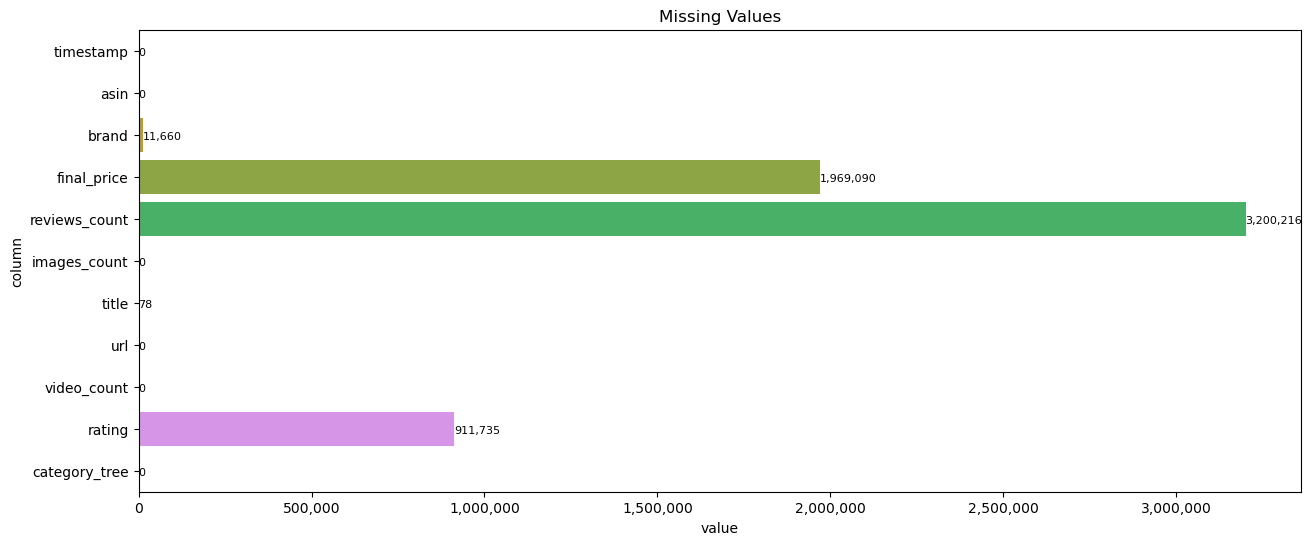

In [18]:
transposed_df = null_counts.toPandas().T.reset_index()

# Rename the columns
transposed_df.columns = ['column', 'value']

# Set the figure size for the chart
plt.figure(figsize=(15, 6))

# Create a horizontal bar chart using Seaborn with the custom figure size
ax = sns.barplot(x='value', y='column', data=transposed_df)
sns.set_palette("dark")

# Set the chart title
plt.title('Missing Values')

for p in ax.patches:
    width = p.get_width()
    value = '{:,.0f}'.format(width)
    x = width + 0.1
    y = p.get_y() + p.get_height() / 2 + 0.1
    ax.annotate(value, (x, y), fontsize=8)
    
# Format y-axis labels with a thousands comma separator
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Display the chart
plt.show()

#### <font color='green'>Clean and transform the final_price column</font>

In [19]:
# Get the first price if there are two prices listed
df = df.withColumn("final_price", split(col("final_price"), " ").getItem(0))

In [20]:
# Drop the rows where the price is missing
df = df.na.drop(subset=["final_price"])

In [21]:
# Double check that there's definitely no missing values in the final_price column
df.filter(col("final_price").isNull()).count()

0

In [22]:
# Remove the $ sign from the final_price column and change the data type from string to double
df = df.withColumn("final_price", regexp_replace(col("final_price"), "[US$,]", "").cast('double'))

In [23]:
df.limit(6).toPandas()

,timestamp,asin,brand,final_price,reviews_count,images_count,title,url,video_count,rating,category_tree
0,2022-09-21,B01ABPEWK2,LSI Logic,75.00,NaN,1,LSI Logic 8-Ports External 6G/S SATA+SAS PCI-E...,https://www.amazon.com/dp/B01ABPEWK2?language=...,0,0.0,"[""Electronics"",""Computers & Accessories"",""Comp..."
1,2022-10-11,B08SXPH879,Bang & Olufsen,1270.20,23.0,16,Bang & Olufsen Beosound Level Portable Wi-Fi M...,https://www.amazon.com/dp/B08SXPH879?language=...,1,4.0,"[""Electronics"",""Portable Audio & Video"",""Porta..."
2,2022-10-23,B0B1QBJNSH,Aceele,41.99,47.0,8,"Aceele USB C Hub, USB C Docking Station Dual M...",https://www.amazon.com/dp/B0B1QBJNSH?language=...,3,4.0,"[""Electronics"",""Computers & Accessories"",""Comp..."
3,2022-09-07,B09FGNHT6L,OMECKY,15.99,NaN,7,[Front LED Visible] OMECKY Compatible with Air...,https://www.amazon.com/dp/B09FGNHT6L?language=...,0,0.0,"[""Electronics"",""Headphones, Earbuds & Accessor..."
4,2022-10-25,B0B5XLPWVF,TEOLANT,84.99,49.0,8,"USB C Docking Station, Teolant 11 in 1 Quadrup...",https://www.amazon.com/dp/B0B5XLPWVF?language=...,1,5.0,"[""Electronics"",""Computers & Accessories"",""Lapt..."
5,2022-10-12,B0932X82LV,BRAECN,38.99,2600.0,6,BRAECN Kids Case for iPad 6th/5th 9.7 Inch 201...,https://www.amazon.com/dp/B0932X82LV?language=...,2,5.0,"[""Electronics"",""Computers & Accessories"",""Tabl..."


In [24]:
# Check the schema
df.printSchema()

root
 |-- timestamp: date (nullable = true)
 |-- asin: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- final_price: double (nullable = true)
 |-- reviews_count: integer (nullable = true)
 |-- images_count: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- video_count: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- category_tree: string (nullable = true)



#### <font color='green'>Clean the rating column</font>

In [25]:
df = df.na.drop(subset=["rating"])

In [26]:
# Double check that there's definitely no missing values in the rating column
df.filter(col("rating").isNull()).count()

0

#### <font color='green'>Get the detailed category from the category_tree column (i.e. the last element from the list, the most granular category description</font>

In [27]:
# Replace the square brackets and the quotation marks with nothing using regex
df = df.withColumn("category_tree", regexp_replace(col("category_tree"), r'[\[\]\"]', ''))

In [28]:
# Creating category array column so we can extract the last element
df = df.withColumn('cat_arr', split(df.category_tree, ','))

In [29]:
# Creating the detailed category column
df = df.withColumn('detailed_category', df.cat_arr[size(df.cat_arr)-1])

In [30]:
pd.options.display.max_colwidth = None

In [31]:
df.select('brand', 'title', 'category_tree', 'detailed_category').limit(5).toPandas()

,brand,title,category_tree,detailed_category
0,LSI Logic,LSI Logic 8-Ports External 6G/S SATA+SAS PCI-E 2.0 HBA IN the Box: SAS 9200-8E Qig H5-25086-01,"Electronics,Computers & Accessories,Computer Components,Internal Components,I/O Port Cards,RAID Controllers",RAID Controllers
1,Bang & Olufsen,"Bang & Olufsen Beosound Level Portable Wi-Fi Multiroom Speaker, Natural Aluminum/Dark Grey","Electronics,Portable Audio & Video,Portable Speakers & Docks,Portable Bluetooth Speakers",Portable Bluetooth Speakers
2,Aceele,"Aceele USB C Hub, USB C Docking Station Dual Monitor, 12 in 1 Triple Display Type C Hub Multiport Adapter with 2HDMI VGA PD Ethernet SD/TF Card Reader USB C Data 4USB Ports for Dell/HP/Lenovo/MacBook","Electronics,Computers & Accessories,Computer Accessories & Peripherals,USB Hubs",USB Hubs
3,OMECKY,"[Front LED Visible] OMECKY Compatible with Airpods Pro Case, Luxury Leather Skin Case Cover Shock-Absorbing Protective Case with Keychain, Pink","Electronics,Headphones, Earbuds & Accessories,Cases",Cases
4,TEOLANT,"USB C Docking Station, Teolant 11 in 1 Quadruple Display Laptop Docking Station Triple Monitors, Displaylink USB C Dock Dual HDMI VGA Adapter, Compatible with MacBook M1 M2 HP Dell Lenovo","Electronics,Computers & Accessories,Laptop Accessories,Docking Stations",Docking Stations


In [32]:
# Count the distinct values in the detailed_category column
(df.groupBy('detailed_category').count()).count()

876

#### <font color='red'>Which detailed product categories have the most products?</font>

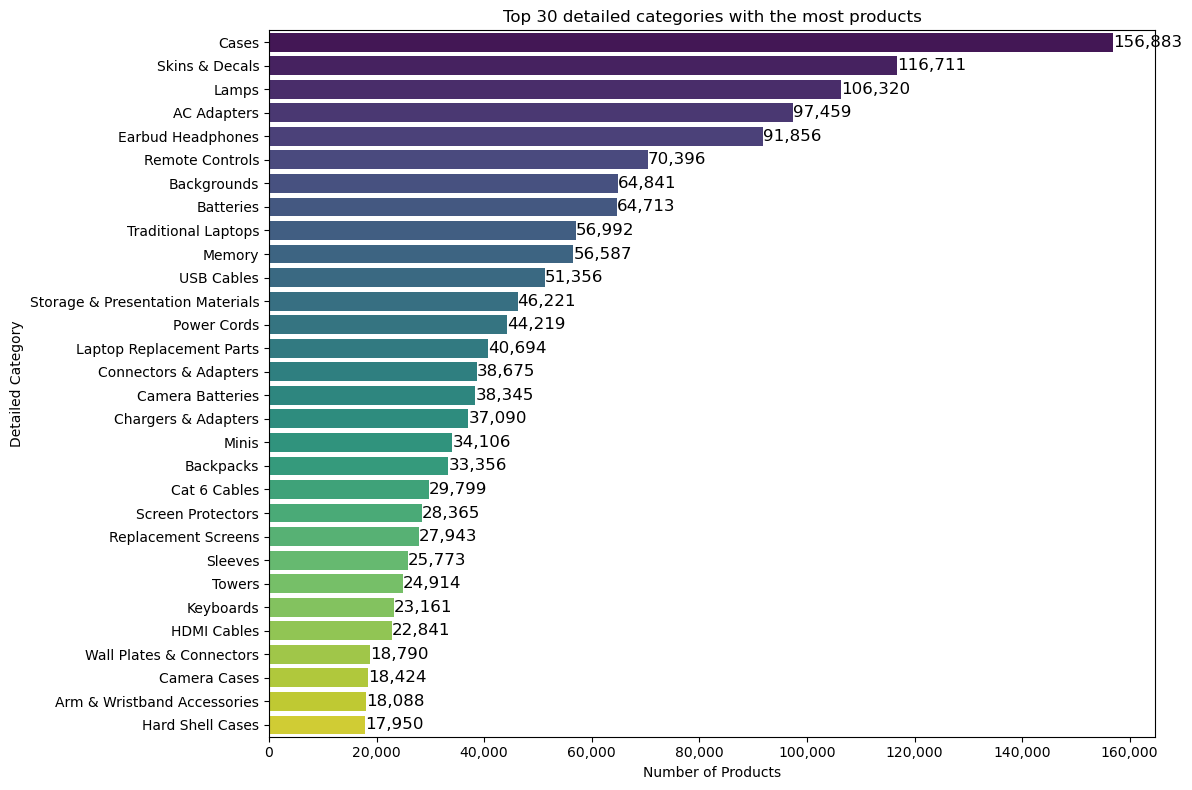

In [33]:
# Group by 'detailed_category' and count the number of rows for each category
grouped_df = df.groupBy("detailed_category").agg(count("*").alias("count"))

# Order by the count in descending order and limit to the top 20 categories
top_30_df = grouped_df.orderBy(col("count").desc()).limit(30)

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting with seaborn
pandas_df = top_30_df.toPandas()

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="count", y="detailed_category", data=pandas_df, palette="viridis")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Format the data labels with a thousands comma separator and add them to the bars
for index, value in enumerate(pandas_df["count"]):
    ax.text(value, index, f"{value:,.0f}", ha='left', va='center', color='black', fontsize=12)

ax.set_xlabel("Number of Products")
ax.set_ylabel("Detailed Category")
ax.set_title("Top 30 detailed categories with the most products")

plt.tight_layout()
plt.show()

#### <font color='red'>Let's focus our analysis on a specific detailed category</font>

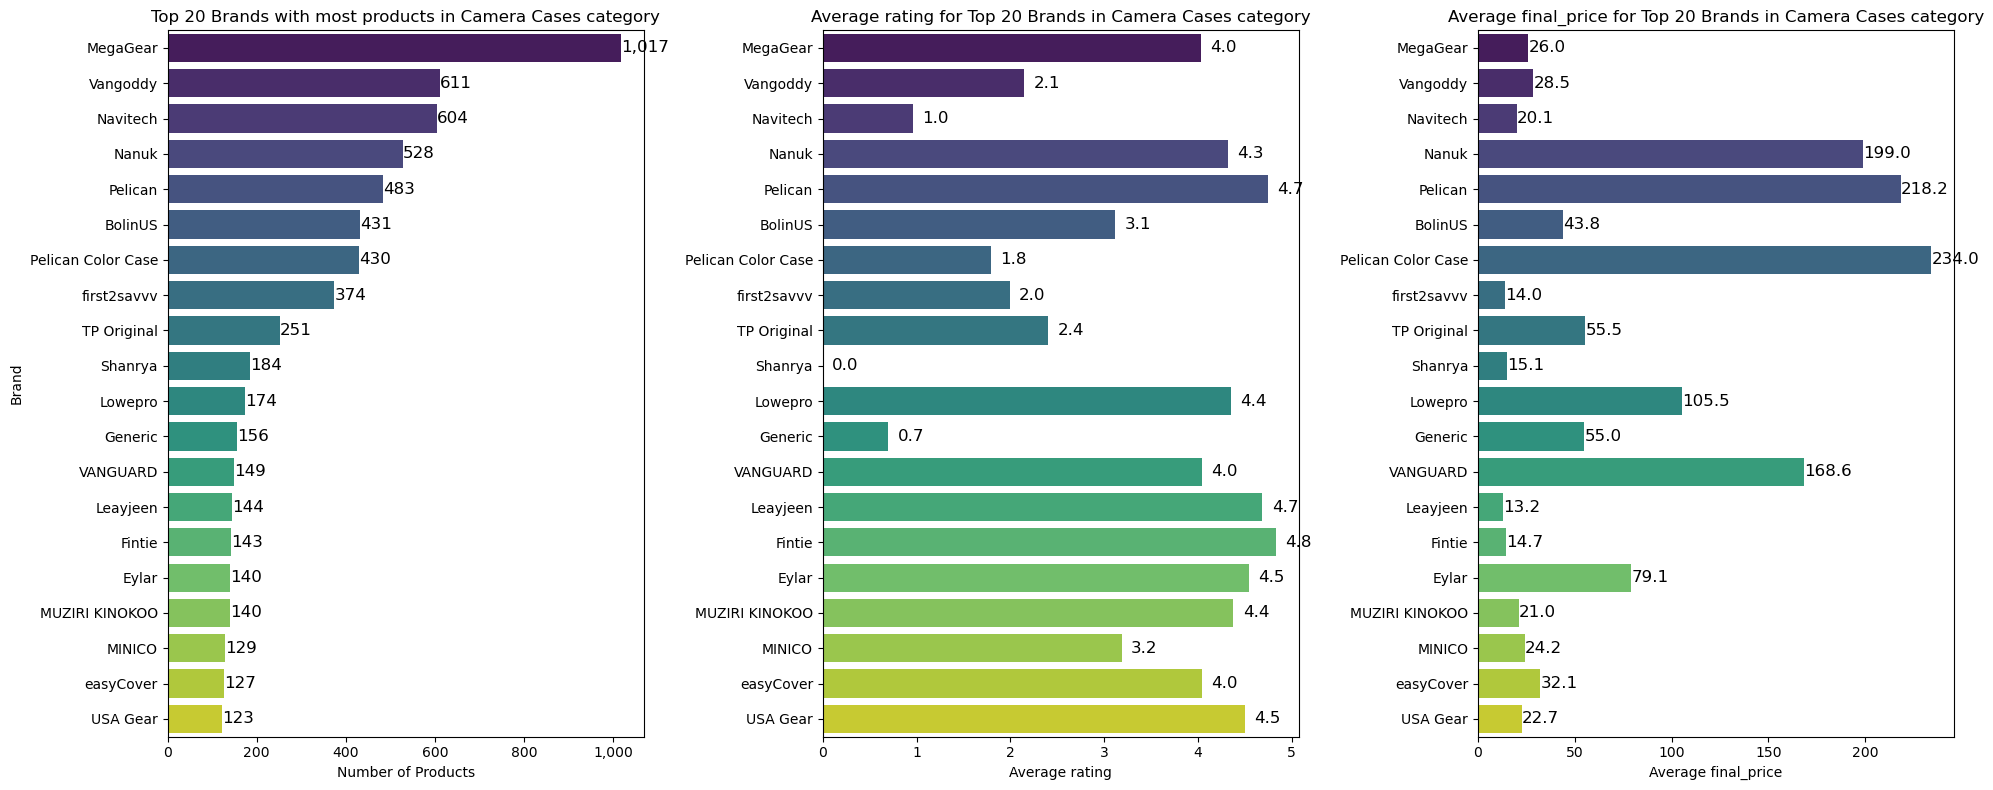

In [34]:
# Define the variables that we want to specify
det_cat = 'Camera Cases'
metric1 = 'rating'
metric2 = 'final_price'

# Filter the DataFrame to keep only rows where 'detailed_category' is 'Cases'
filtered_df = df.filter(col("detailed_category") == det_cat)

# Group by 'brand' and count the number of rows for each brand
grouped_df = filtered_df.groupBy("brand").agg(count("*").alias("brand_count"))

# Calculate the average metric (final_price) for each brand
avg_metric1_df = filtered_df.groupBy("brand").agg(avg(metric1).alias("avg_metric1"))

# Calculate the average rating for each brand
avg_metric2_df = filtered_df.groupBy("brand").agg(avg(metric2).alias("avg_metric2"))

# Join the grouped_df, avg_metric_df, and avg_rating_df DataFrames on 'brand' to combine the information
pandas_df = grouped_df.join(avg_metric1_df, on="brand", how="inner").join(avg_metric2_df, on="brand", how="inner").toPandas()

# Sort the DataFrame in descending order based on brand count
pandas_df = pandas_df.sort_values(by="brand_count", ascending=False)

# Limit the result to the top 20 brands by count
pandas_df = pandas_df.head(20)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Plot the first horizontal bar chart for brand count
sns.barplot(x="brand_count", y="brand", data=pandas_df, palette="viridis", ax=axes[0])

# Format the data labels for brand count
for index, value in enumerate(pandas_df["brand_count"]):
    axes[0].text(value, index, f"{value:,.0f}", ha='left', va='center', color='black', fontsize=12)

# Format the x-axis labels for brand count
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Set labels and title for the first plot
axes[0].set_xlabel("Number of Products")
axes[0].set_ylabel("Brand")
axes[0].set_title("Top 20 Brands with most products in " + det_cat + " category")

# Plot the second horizontal bar chart for average metric (final_price)
sns.barplot(x="avg_metric1", y="brand", data=pandas_df, palette="viridis", ax=axes[1])

# Set a small offset for the data labels
label_offset = 0.1

# Format the data labels for average metric (final_price)
for index, value in enumerate(pandas_df["avg_metric1"]):
    axes[1].text(value + label_offset, index, f"{value:.1f}", ha='left', va='center', color='black', fontsize=12)

# Set labels and title for the second plot
axes[1].set_xlabel("Average " + metric1)
axes[1].set_ylabel("")  # Hide the ylabel for the second plot
axes[1].set_title("Average " + metric1 + " for Top 20 Brands in " + det_cat + " category")

# Plot the third horizontal bar chart for average rating
sns.barplot(x="avg_metric2", y="brand", data=pandas_df, palette="viridis", ax=axes[2])

# Format the data labels for average rating
for index, value in enumerate(pandas_df["avg_metric2"]):
    axes[2].text(value + label_offset, index, f"{value:.1f}", ha='left', va='center', color='black', fontsize=12)

# Set labels and title for the third plot
axes[2].set_xlabel("Average " + metric2)
axes[2].set_ylabel("")  # Hide the ylabel for the third plot
axes[2].set_title("Average " + metric2 + " for Top 20 Brands in " + det_cat + " category")

# Adjust spacing between the subplots
plt.tight_layout()

# Display the plots
plt.show()

#### <font color='red'>Which specific products should we do a deep-dive on?</font>

In [35]:
#brands = ['Pelican','Nanuk'] # expensive
#brands = ['Lowepro','Eylar'] # medium
brands = ['Fintie','Leayjeen'] # cheap

(df.filter(col("brand").isin(brands) & (col("detailed_category") == det_cat))
              .sort(col("rating").desc())
              .limit(30)
              .toPandas())

,timestamp,asin,brand,final_price,reviews_count,images_count,title,url,video_count,rating,category_tree,cat_arr,detailed_category
0,2022-10-14,B08QCNSD59,Leayjeen,10.78,262,6,Leayjeen Digital Camera Case Compatible with YISENCE/Underwater Camera FHD 2.7K 48 MP Waterproof Camera Underwater Digital Video Camera (Case Only) (Blue),https://www.amazon.com/dp/B08QCNSD59?language=en_US&currency=USD,6,5.0,"Electronics,Camera & Photo,Bags & Cases,Camera Cases","[Electronics, Camera & Photo, Bags & Cases, Camera Cases]",Camera Cases
1,2022-10-08,B08DLKWYPT,Leayjeen,12.98,656,6,"Leayjeen Kids Digital Camera Case Compatible with WOWGO/Coolwill/SUZIYO/YINGOOT and More Kids Video Camera,Children's Selfie Camera,Rechargeable Electronic Camera(Case Only)",https://www.amazon.com/dp/B08DLKWYPT?language=en_US&currency=USD,6,5.0,"Electronics,Camera & Photo,Bags & Cases,Camera Cases","[Electronics, Camera & Photo, Bags & Cases, Camera Cases]",Camera Cases
2,2022-10-15,B09HBQMSDT,Fintie,17.99,2,8,"Fintie Protective Case for Polaroid Lab Instant Printer - [Perfect Fitting Design] Hard Shell Portable Shockproof Storage Bag, Black",https://www.amazon.com/dp/B09HBQMSDT?language=en_US&currency=USD,0,5.0,"Electronics,Camera & Photo,Bags & Cases,Camera Cases","[Electronics, Camera & Photo, Bags & Cases, Camera Cases]",Camera Cases
3,2023-05-04,B0915NZ8M6,Leayjeen,16.98,876,6,Leayjeen Kids Instant Camera Case Compatible with VTech KidiZoom Printcam/Dragon Touch and More Kids Instant Digital Camera (Case Only)(Blue),https://www.amazon.com/dp/B0915NZ8M6?language=en_US&currency=USD,6,5.0,"Electronics,Camera & Photo,Bags & Cases,Camera Cases","[Electronics, Camera & Photo, Bags & Cases, Camera Cases]",Camera Cases
4,2022-10-10,B08QV69QGS,Leayjeen,12.98,656,6,"Leayjeen Kids Digital Camera Case Compatible with WOWGO/Coolwill/SUZIYO/YINGOOT and More Kids Video Camera,Children's Selfie Camera,Rechargeable Electronic Camera(Case Only)",https://www.amazon.com/dp/B08QV69QGS?language=en_US&currency=USD,6,5.0,"Electronics,Camera & Photo,Bags & Cases,Camera Cases","[Electronics, Camera & Photo, Bags & Cases, Camera Cases]",Camera Cases
5,2023-05-12,B07RV83JFV,Fintie,16.99,328,9,"Fintie Silicone Case for Ring Spotlight Cam, Soft Silicone Weather Resistant Protective Skin Cover for Ring Spotlight Battery HD Security Camera, Black",https://www.amazon.com/dp/B07RV83JFV?language=en_US&currency=USD,0,5.0,"Electronics,Camera & Photo,Bags & Cases,Camera Cases","[Electronics, Camera & Photo, Bags & Cases, Camera Cases]",Camera Cases
6,2023-05-10,B09C5JC3YV,Fintie,16.99,478,9,"Fintie Protective Case for Fujifilm Instax Square SQ1 Instant Camera - Premium Vegan Leather Bag Cover with Removable Adjustable Strap, Vintage Black",https://www.amazon.com/dp/B09C5JC3YV?language=en_US&currency=USD,0,5.0,"Electronics,Camera & Photo,Bags & Cases,Camera Cases","[Electronics, Camera & Photo, Bags & Cases, Camera Cases]",Camera Cases
7,2022-10-06,B087RC5PDT,Fintie,12.99,528,9,"Fintie Protective Case for Fujifilm Instax Mini 11 Instant Camera - Premium Vegan Leather Bag Cover with Removable Adjustable Strap, Marble",https://www.amazon.com/dp/B087RC5PDT?language=en_US&currency=USD,0,5.0,"Electronics,Camera & Photo,Bags & Cases,Camera Cases","[Electronics, Camera & Photo, Bags & Cases, Camera Cases]",Camera Cases
8,2023-05-05,B09LQJ4F5P,Fintie,14.99,605,9,"Fintie Protective Case for Fujifilm Instax Mini 11 Instant Camera - Premium Vegan Leather Bag Cover with Removable Adjustable Strap, Black",https://www.amazon.com/dp/B09LQJ4F5P?language=en_US&currency=USD,0,5.0,"Electronics,Camera & Photo,Bags & Cases,Camera Cases","[Electronics, Camera & Photo, Bags & Cases, Camera Cases]",Camera Cases
9,2022-10-08,B08FWHHPNN,Fintie,17.99,126,8,"Fintie Protective Case for Polaroid OneStep+, Onestep 2 VF, Now+, Now I-Type Instant Film Camera - [Unique Shape Design] Hard Shell Carrying Case w/Adjustable Hand Strap & Metal Hook, Black",https://www.amazon.com/dp/B08FWHHPNN?language=en_US&currency=USD,0,5.0,"Electr

#### <font color='red'>How many images and videos should our products have?</font>

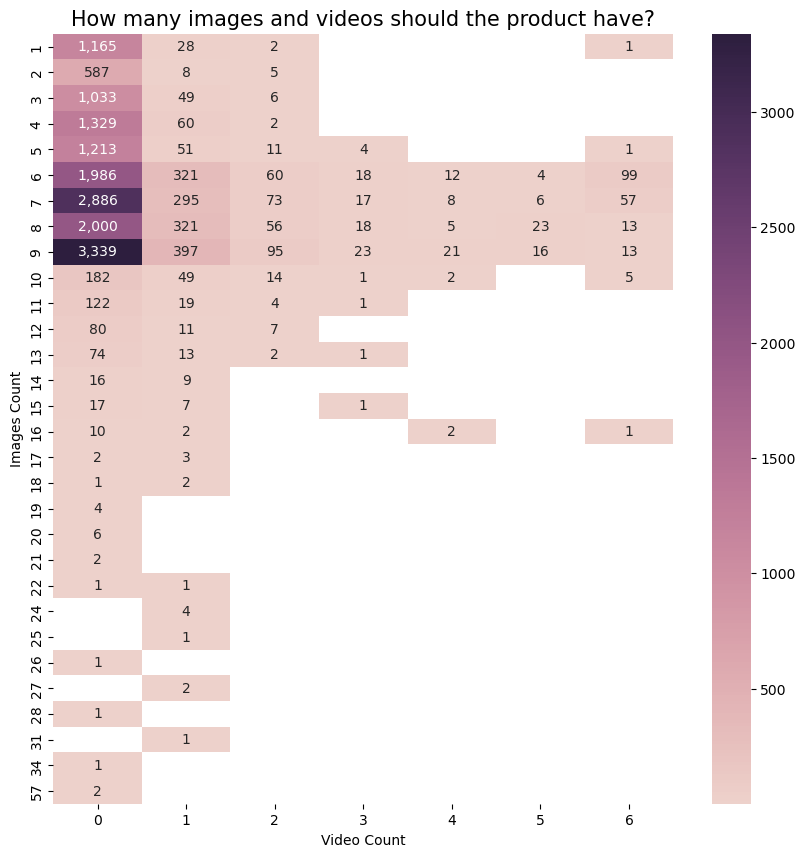

In [37]:
#brands = ['Pelican','Nanuk'] # expensive
#brands = ['Lowepro','Eylar'] # medium
brands = ['Fintie','Leayjeen'] # cheap


df_filtered = df.filter(col("brand").isin(brands) & (col("detailed_category") == det_cat))

# Group by 'images_count' and 'video_count' and count the occurrences
grouped_df = filtered_df.groupBy("images_count", "video_count").count()

# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = grouped_df.toPandas()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 10))
heatmap_data = pandas_df.pivot("images_count", "video_count", "count")
sns.heatmap(heatmap_data, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), cbar=True, fmt=",g")

# Customize the plot
plt.xlabel("Video Count")
plt.ylabel("Images Count")
plt.title("How many images and videos should the product have?", fontsize=15)

# Show the plot
plt.show()